In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
path="D:/amb108"
os.listdir(path)

['Result.xlsx', 'Test', 'Train', 'Validation']

In [2]:
len(os.listdir(path))

4

In [4]:
train_dir = "D:/amb108/Train/Ambulance/"
test_dir = "D:/amb108/Test/Ambulance"
valid_dir="D:/amb108/Validation"

Train set:
Ambulance=205


Test set:
Ambulance=40


Validation set:
Ambulance=8




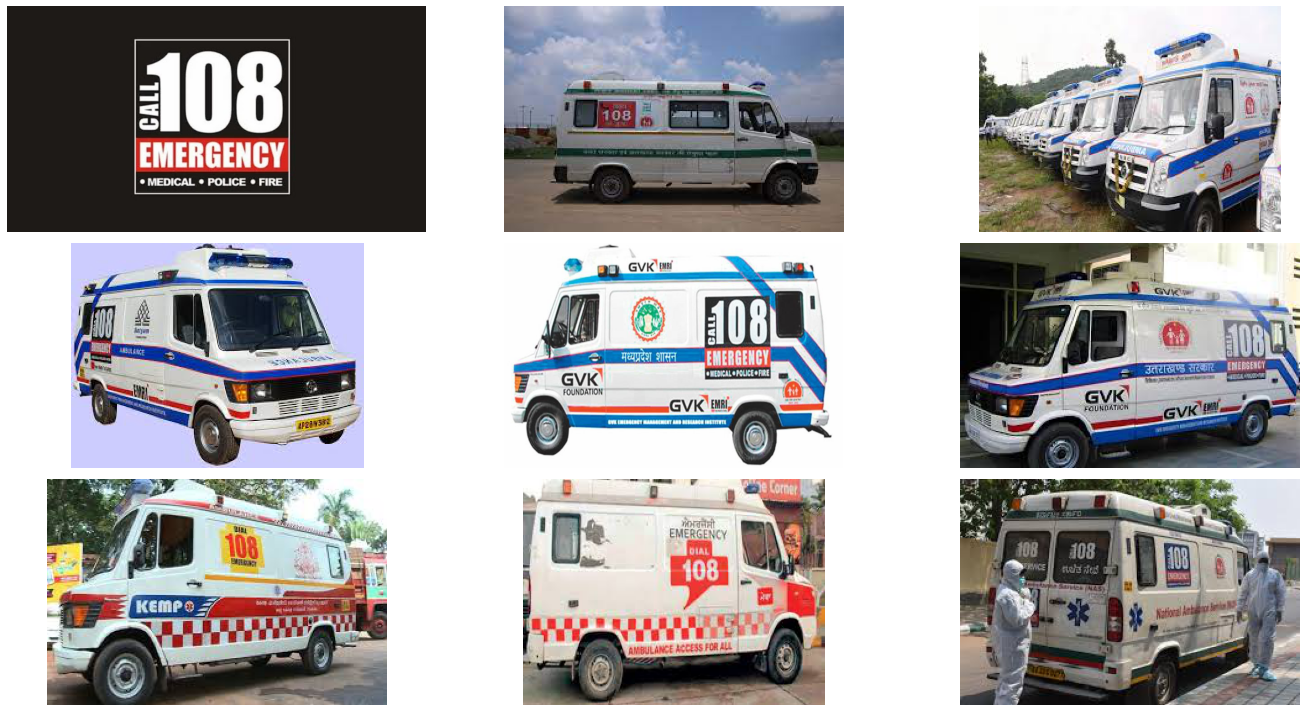

In [5]:
print("Train set:\n========================================")
Amb = len(os.listdir(os.path.join(train_dir, 'converted')))

print(f"Ambulance={Amb}")

print("\n")


print("Test set:\n========================================")
Amb = len(os.listdir(os.path.join(test_dir, 'converted')))

print(f"Ambulance={Amb}")

print("\n")

print("Validation set:\n========================================")
Amb = len(os.listdir(os.path.join(valid_dir, 'Ambulance')))

print(f"Ambulance={Amb}")



Ambulance_path=os.listdir("D:/amb108/Train/Ambulance")
Amb_dir="D:/amb108/Train/Ambulance"


print("\n")

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Amb_dir, Ambulance_path[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [6]:
import os
import glob
from PIL import Image

dst_dir = 'D:\\amb108\Test\Ambulance'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('D:\\amb108\Test\Ambulance\*.jpg')

for f in files:
    img = Image.open(f)
    if img.mode!='RGB':
        img=img.convert('RGB')
    img_resize = img.resize((img.width // 5, img.height // 5))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    #img_resize.save(os.path.join(dst_dir, basename + '_half' + ext))
    img_resize.save(os.path.join("D:\\amb108\Test\Ambulance\converted", basename + '_half' + ext))
    #Image.open('old.jpeg').convert('RGB').save('new.jpeg')

C:\Users\prawi\anaconda3\lib\site-packages\PIL\Image.py:2966: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


UnidentifiedImageError: cannot identify image file 'D:\\amb108\\Test\\Ambulance\\9.jpg'

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    )

In [23]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=20, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(180, 180))

valid_it = image_generator.flow_from_directory(valid_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(180, 180))



Found 205 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=METRICS,
              )

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_25 (Bat  (None, 176, 176, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 88, 88, 32)       0         
 g2D)                                                            
                                                      

In [26]:
r = model.fit(
    train, 
    epochs=20,
    validation_data=valid_it,
    steps_per_epoch=train.samples/train.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size,
)

Epoch 1/20
10/10 [==============================] - 46s 4s/step - loss: 0.0000e+00 - accuracy: 0.9707 - precision: 1.0000 - recall: 0.9707 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.0000e+00 - accuracy: 0.9902 - precision: 1.0000 - recall: 0.9902 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.0000e+00 - accuracy: 0.9805 - precision: 1.0000 - recall: 0.9805 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.0000e+00 - accuracy: 0.9902 - precision: 1.0000 - recall: 0.9902 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/20
10/10 [==============================] - 41s 4s/step - loss: 0.0000e+

In [27]:
r = model.fit(
    train, 
    epochs=20,
    validation_data=valid_it,
    steps_per_epoch=train.samples/train.batch_size,
    validation_steps=valid_it.samples/valid_it.batch_size,
)

Epoch 1/20
10/10 [==============================] - 34s 3s/step - loss: 0.0000e+00 - accuracy: 0.9756 - precision: 1.0000 - recall: 0.9756 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
10/10 [==============================] - 34s 3s/step - loss: 0.0000e+00 - accuracy: 0.9854 - precision: 1.0000 - recall: 0.9854 - val_loss: 0.0000e+00 - val_accuracy: 0.8750 - val_precision: 1.0000 - val_recall: 0.8750
Epoch 3/20
10/10 [==============================] - 34s 3s/step - loss: 0.0000e+00 - accuracy: 0.9854 - precision: 1.0000 - recall: 0.9854 - val_loss: 0.0000e+00 - val_accuracy: 0.7500 - val_precision: 1.0000 - val_recall: 0.7500
Epoch 4/20
10/10 [==============================] - 35s 3s/step - loss: 0.0000e+00 - accuracy: 0.9707 - precision: 1.0000 - recall: 0.9707 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/20
10/10 [==============================] - 34s 3s/step - loss: 0.0000e+

Text(0.5, 1.0, 'Accuracy Evolution')

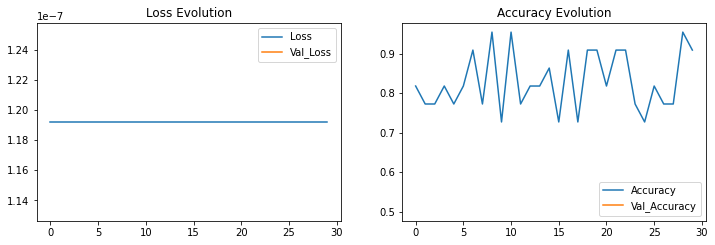

In [74]:
%matplotlib inline
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [75]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 2s 88ms/step - loss: 1.1921e-07 - accuracy: 0.8000
Test Accuracy: 80.00%
11/11 [==============================] - 7s 678ms/step - loss: 1.1921e-07 - accuracy: 0.8293
Train Accuracy: 82.93%


In [107]:
from tensorflow.keras.applications import MobileNetV2

MobileNet_model = MobileNetV2(input_shape=(192,192,3), include_top=False, weights='imagenet')

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

MobileNet_model.trainable = False

model = tf.keras.Sequential([
  MobileNet_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
'''METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]'''

In [128]:
#MobileNet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)
validation_steps=50
initial_epochs = 50

history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=valid_it)

loss0,accuracy0 = model.evaluate(valid_it, steps = validation_steps)



Epoch 1/50
11/11 [==============================] - 5s 499ms/step - loss: 0.0000e+00 - accuracy: 0.0927 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 6s 537ms/step - loss: 0.0000e+00 - accuracy: 0.0878 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 5s 498ms/step - loss: 0.0000e+00 - accuracy: 0.0780 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 6s 527ms/step - loss: 0.0000e+00 - accuracy: 0.1024 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 6s 503ms/step - loss: 0.0000e+00 - accuracy: 0.0780 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 6/50
11/11 [==============================] - 6s 501ms/step - loss: 0.0000e+00 - accuracy: 0.0927 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 6s 573ms/step - loss: 0.0000

In [121]:
validation_steps=20
initial_epochs = 20

history = model.fit(test,
                    epochs=initial_epochs,
                    validation_data=valid_it)

loss0,accuracy0 = model.evaluate(valid_it, steps = validation_steps)

Epoch 1/20
20/20 [==============================] - 2s 81ms/step - loss: 0.0000e+00 - accuracy: 0.2250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 2s 78ms/step - loss: 0.0000e+00 - accuracy: 0.1500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
20/20 [==============================] - 2s 79ms/step - loss: 0.0000e+00 - accuracy: 0.1750 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
20/20 [==============================] - 2s 82ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 5/20
20/20 [==============================] - 2s 79ms/step - loss: 0.0000e+00 - accuracy: 0.1500 - val_loss: 0.0000e+00 - val_accuracy: 0.2500
Epoch 6/20
20/20 [==============================] - 2s 79ms/step - loss: 0.0000e+00 - accuracy: 0.1750 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
20/20 [==============================] - 2s 81ms/step - loss: 0.0000e+00 - accu

In [129]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 1s 64ms/step - loss: 0.0000e+00 - accuracy: 0.1250
Test Accuracy: 12.50%
11/11 [==============================] - 5s 457ms/step - loss: 0.0000e+00 - accuracy: 0.0976
Train Accuracy: 9.76%


In [9]:
from tensorflow.keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

In [10]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,BatchNormalization,Dropout
resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [15]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=METRICS)

In [134]:
r = resnet_model.fit(train,
          epochs=15,
          validation_data=valid_it,
          steps_per_epoch=10,
          validation_steps=25,)

Epoch 1/15
10/10 [==============================] - 114s 11s/step - loss: 1.1921e-07 - accuracy: 0.5000 - precision: 1.0000 - recall: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 0.1250 - val_precision: 1.0000 - val_recall: 0.1250
Epoch 2/15
10/10 [==============================] - 117s 12s/step - loss: 1.1921e-07 - accuracy: 0.5243 - precision: 1.0000 - recall: 0.5243
Epoch 3/15
10/10 [==============================] - 105s 11s/step - loss: 1.1921e-07 - accuracy: 0.4973 - precision: 1.0000 - recall: 0.4973
Epoch 4/15
10/10 [==============================] - 97s 10s/step - loss: 1.1921e-07 - accuracy: 0.5189 - precision: 1.0000 - recall: 0.5189
Epoch 5/15
10/10 [==============================] - 104s 10s/step - loss: 1.1921e-07 - accuracy: 0.4300 - precision: 1.0000 - recall: 0.4300
Epoch 6/15
10/10 [==============================] - 97s 10s/step - loss: 1.1921e-07 - accuracy: 0.4865 - precision: 1.0000 - recall: 0.4865
Epoch 7/15
10/10 [==============================] - 97s 10s/step 

In [135]:
r = resnet_model.fit(test,
          epochs=15,
          validation_data=valid_it,
          steps_per_epoch=10,
          validation_steps=25,)

Epoch 1/15
10/10 [==============================] - 13s 1s/step - loss: 1.1921e-07 - accuracy: 0.4500 - precision: 1.0000 - recall: 0.4500 - val_loss: 1.1921e-07 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 11s 1s/step - loss: 1.1921e-07 - accuracy: 0.5500 - precision: 1.0000 - recall: 0.5500
Epoch 3/15
10/10 [==============================] - 11s 1s/step - loss: 1.1921e-07 - accuracy: 0.5500 - precision: 1.0000 - recall: 0.5500
Epoch 4/15
10/10 [==============================] - 12s 1s/step - loss: 1.1921e-07 - accuracy: 0.6500 - precision: 1.0000 - recall: 0.6500
Epoch 5/15
10/10 [==============================] - 12s 1s/step - loss: 1.1921e-07 - accuracy: 0.4500 - precision: 1.0000 - recall: 0.4500
Epoch 6/15
10/10 [==============================] - 12s 1s/step - loss: 1.1921e-07 - accuracy: 0.7000 - precision: 1.0000 - recall: 0.7000
Epoch 7/15
10/10 [==============================] - 11s 1s/step

In [136]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 4s 207ms/step - loss: 1.1921e-07 - accuracy: 0.2000 - precision: 1.0000 - recall: 0.2000
Test Accuracy: 20.00%
11/11 [==============================] - 15s 1s/step - loss: 1.1921e-07 - accuracy: 0.3317 - precision: 1.0000 - recall: 0.3317
Train Accuracy: 33.17%


In [16]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

In [18]:
r = resnet_model.fit(train,
          epochs=15,
          validation_data=valid_it,
          steps_per_epoch=10,
          validation_steps=25,)

Epoch 1/15
10/10 [==============================] - 100s 10s/step - loss: 1.1921e-07 - accuracy: 0.5150 - precision: 1.0000 - recall: 0.5150 - val_loss: 1.1921e-07 - val_accuracy: 0.5000 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 2/15
10/10 [==============================] - 91s 9s/step - loss: 1.1921e-07 - accuracy: 0.4541 - precision: 1.0000 - recall: 0.4541
Epoch 3/15
10/10 [==============================] - 103s 10s/step - loss: 1.1921e-07 - accuracy: 0.4703 - precision: 1.0000 - recall: 0.4703
Epoch 4/15
10/10 [==============================] - 95s 10s/step - loss: 1.1921e-07 - accuracy: 0.5135 - precision: 1.0000 - recall: 0.5135
Epoch 5/15
10/10 [==============================] - 105s 11s/step - loss: 1.1921e-07 - accuracy: 0.4811 - precision: 1.0000 - recall: 0.4811
Epoch 6/15
10/10 [==============================] - 110s 11s/step - loss: 1.1921e-07 - accuracy: 0.4973 - precision: 1.0000 - recall: 0.4973
Epoch 7/15
10/10 [==============================] - 110s 11s/step 

In [17]:
r = resnet_model.fit(test,
          epochs=15,
          validation_data=valid_it,
          steps_per_epoch=10,
          validation_steps=25,)

Epoch 1/15
10/10 [==============================] - 14s 1s/step - loss: 1.1921e-07 - accuracy: 0.5000 - precision: 1.0000 - recall: 0.5000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/15
10/10 [==============================] - 10s 1s/step - loss: 1.1921e-07 - accuracy: 0.5000 - precision: 1.0000 - recall: 0.5000
Epoch 3/15
10/10 [==============================] - 10s 1s/step - loss: 1.1921e-07 - accuracy: 0.3500 - precision: 1.0000 - recall: 0.3500
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 1.1921e-07 - accuracy: 0.4500 - precision: 1.0000 - recall: 0.4500
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 1.1921e-07 - accuracy: 0.5500 - precision: 1.0000 - recall: 0.5500
Epoch 6/15
10/10 [==============================] - 11s 1s/step - loss: 1.1921e-07 - accuracy: 0.6000 - precision: 1.0000 - recall: 0.6000
Epoch 7/15
10/10 [==============================] - 10s 1s/step - loss: 1.1

In [20]:
evaluation = resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 4s 193ms/step - loss: 1.1921e-07 - accuracy: 0.4750 - precision: 1.0000 - recall: 0.4750
Test Accuracy: 47.50%
11/11 [==============================] - 14s 1s/step - loss: 1.1921e-07 - accuracy: 0.5415 - precision: 1.0000 - recall: 0.5415
Train Accuracy: 54.15%


Text(0.5, 1.0, 'Accuracy Evolution')

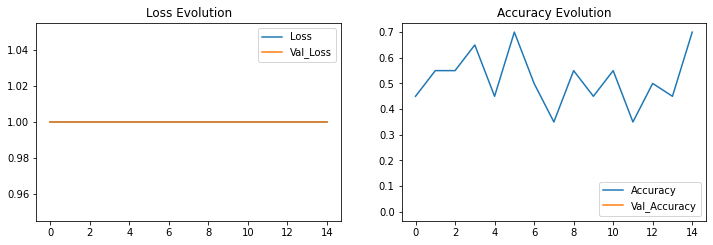

In [137]:
%matplotlib inline
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Loss')
plt.plot(r.history['precision'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [91]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

Text(0.5, 1.0, 'Accuracy Evolution')

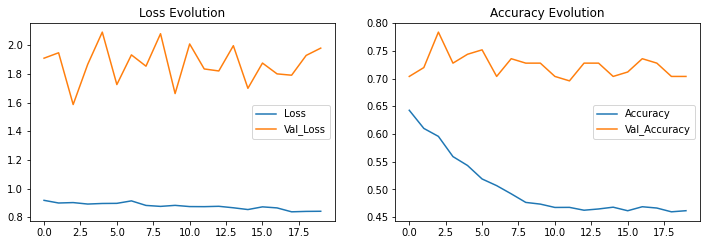

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')